<a href="https://colab.research.google.com/github/Bestakdv/vhs-intro-ai/blob/main/road_network_analysis_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a Road Network Graph Using `osmnx`
In this coding challenge, we are going to work with road network data from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84) using the [osmnx](https://osmnx.readthedocs.io/en/stable/index.html) python package.

*You need to answer ALL question prompts in this notebook. Question prompts are all italicized.*



### 1. Install the `osmnx` Library

Before you begin, ensure that the `osmnx` library is installed. You can do this by running the following command:




```
!pip install osmnx
```



In [28]:
!pip install osmnx

### 2. Import the Required Libraries
Next, you will need to import the necessary libraries in your Python code, and check the version.

In [29]:
import osmnx as ox
ox.__version__

'1.9.4'

### 3. Generate the Graph for a Specific Location

Now, you will generate a road network graph from a specific address.

In this example, we will use the school address: "13051 Whittington Drive, Houston, TX" and generate a graph of roads within a 5,000-meter radius (5 km). We will use the `ox.graph.graph_from_address()` method. (See documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html)

* `address`: This is the starting location around which the graph will be generated. You can replace this address with any other address.
* `dist`: This specifies the radius (in meters) around the address for which the network will be created. In this case, the radius is 5,000 meters (or 5 km).
* `network_type`: This specifies the type of network you want to extract. Options include:
  * "drive": For driving (car) routes.
  * "walk": For pedestrian routes.
  * "bike": For cycling routes.
  * "all": For all types of routes.

In [30]:
# Add code in the blanks
G = ox.graph_from_address(
     address="13051 Whittington Drive, Houston, TX",
     dist=5000,
     network_type="all"
)

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### 4. Visualize the graph
We will use the `ox.project_graph()` and `ox.plot_graph()` methods to visualize the graph.

*4.1 Modify the `node_size` parameter. How does it change the visualisation?*

**Answer:** Changing the node_size parameter makes the visualisation brighter as the nodes become bigger as the the node_size increases


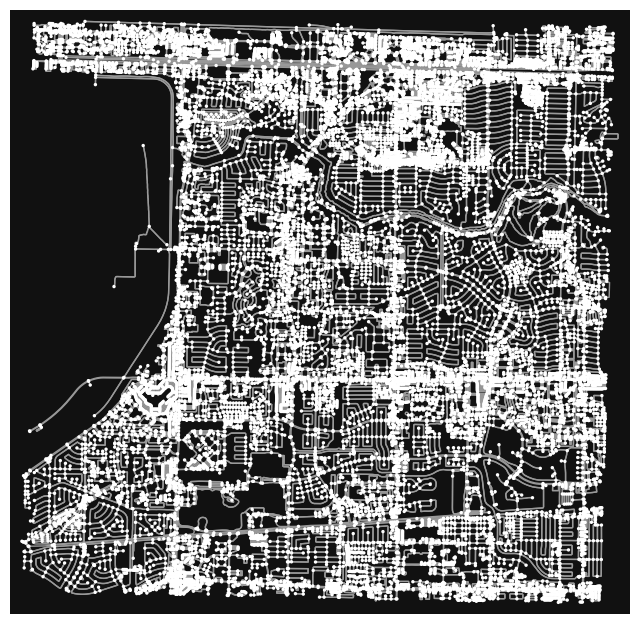

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=6)

### 5. Analyze the graph

*5.1 How many nodes are in the graph? [Use: `G.nodes()`]*
**Answer:** 23459 nodes are in the graph

In [32]:
nodes_list = list(G.nodes())
print(len(nodes_list))
#or
print(len(G.nodes))

23461
23461


*5.2 How many edges are in the graph? [Use: `G.edges`]*
**Answer:** there are 59827 edges

In [33]:
# ADD CODE HERE
edges_list = list(G.edges())
print(len(edges_list))
#or
print(len(G.edges))

59831
59831


*5.3 What information does the node store? Run the code below to get the information for the first node in the graph.*
**Answer:** The node stores the x and y value of the node, and street count

In [34]:
current_node = nodes_list[0]
print(f"Node {current_node}: {G.nodes[current_node]}")

Node 151365266: {'y': 29.749123, 'x': -95.5721842, 'street_count': 4}


*5.4 What information does the edge store? Is the edge weight part of this information?

**Answer:** The edge stores highway, oneway, lanes, name, reversed and length and edge weight could be the length

In [35]:
# ADD CODE HERE
current_edge = list(G.edges(data=True))[0]
u, v, edge_data = current_edge
print(f"Edge from node {u} to node {v}: {edge_data}")

Edge from node 151365266 to node 8292157400: {'osmid': 422675002, 'oneway': True, 'lanes': '2', 'name': 'Wilcrest Drive', 'highway': 'secondary', 'reversed': False, 'length': 17.28}


*5.5 Create a new graph, `G_walk` by specifying `network_type` to "walk". Visualize it and compare it with the road network. How many nodes and edges does `G_walk` contain?*

**Answer:** G_walk has 20124 nodes and 57450 edges

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


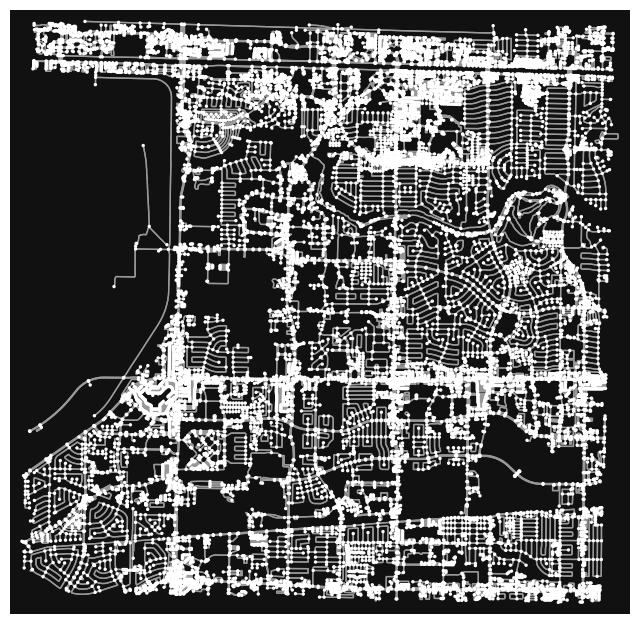

20124
57450


In [36]:
# ADD CODE HERE
G_walk = ox.graph_from_address(
     address="13051 Whittington Drive, Houston, TX",
     dist=5000,
     network_type="walk"
)

Gp1 = ox.project_graph(G_walk)
ox.plot_graph(Gp1, node_size=6)

print(len(G_walk.nodes))
print(len(G_walk.edges))

# Shortest Path using `osmnx`

To find the shortest path, we will use the `shortest_path` method.

### 6. Setup Origin and Destination Nodes
But first, we need to specify the origin and destination using the latitude and longitude values for the location.



 Use google maps, to find the lat-long values of:
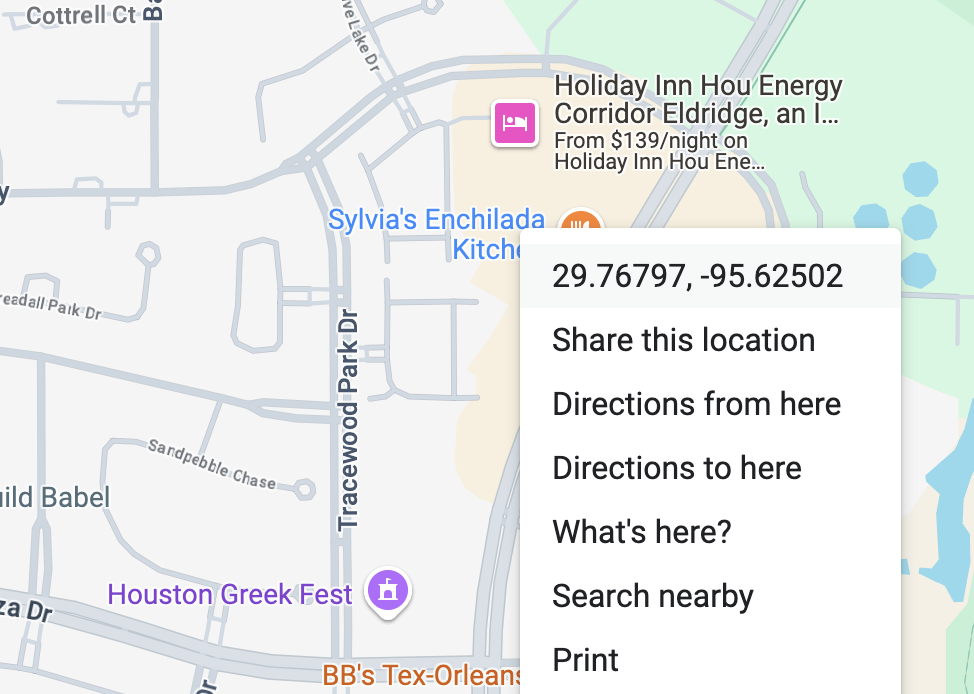
* origin - Village High School
* destination -  Sylvia's Enchilada Kitchen

*6.1 Specify the latitude & longitude as tuple.*

In [37]:
origin = (29.74649479652447, -95.61900340979507) # Point A
destination = (29.774182870720324, -95.61487970221935) # Point B

*6.2 Next use the `nearest_nodes()` method to get the node in the graph that is nearest to the specified location. Note that `x` is longitude and `y` is latitude.*

In [38]:
origin_node = ox.distance.nearest_nodes(G, X=origin[1], Y=origin[0])
destination_node = ox.distance.nearest_nodes(G, X=destination[1], Y=destination[0])

### 7. Find shortest path using `osmnx` `shortest_path()` method
Now we are ready to find the shortest path between the origin and destination using the shortest_path method.

In [39]:
route = ox.shortest_path(G, origin_node, destination_node)

Visualise the shortest path using `plot_graph_route()` method.

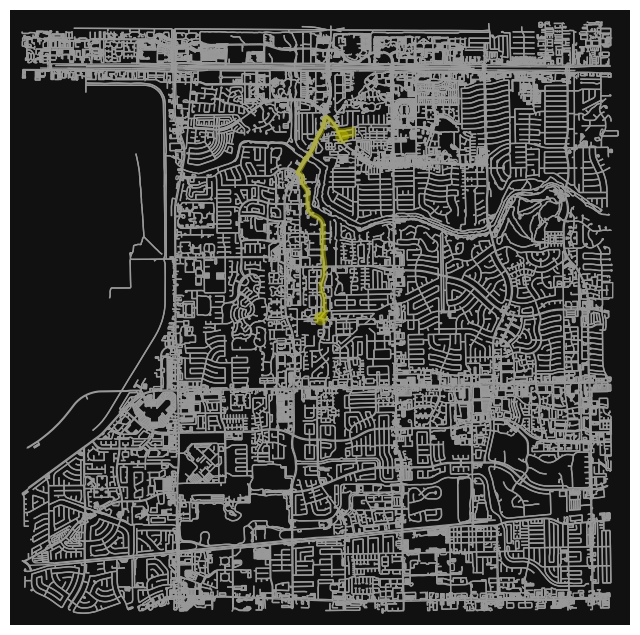

In [40]:
fig, ax = ox.plot_graph_route(G, route, route_color="y", node_size=0)

# Shortest Path using your Dijkstra's method



*8.1 Use the `GraphL` class that you have already created in a previous lesson in this notebook. Note that `GraphL` class should have dijkstra_shortest_path() as a method.*

In [41]:
# ADD GraphL class definition here
import math
import heapq
class GraphL:
    #Constructor
    def __init__(self,num_vertices,directed=False):
      #Attributes
      self.dictionary = {x:[] for x in range (num_vertices)}
      self.directed = directed
      self.num_vertices = num_vertices

    def add_edge(self,u,v,weight):
      #add weight to correct position
      if(not self.directed):
        self.dictionary[u].append([v,weight])

      self.dictionary[v].append([u,weight])

    def remove_edge(self,u,v):
        #removes edges from v,u
        if not self.directed:
          #checks that first tuple doesnt equal u
          self.dictionary[v] = [x for x in self.dictionary[v] if x[0] != u]

        #removes edges from u,v
        #checks that 2nd tuple doesnt equal v
        self.dictionary[u] = [x for x in self.dictionary[u] if x[0] != v]

    def display(self):
      for node in self.dictionary:
        print(node)

    def get_neighbors(self, vertex):
      if vertex in self.dictionary:
            return [neighbor[0] for neighbor in self.dictionary[vertex]]
      else:
            return []

    def has_edge(self,u,v):
      edges = self.dictionary.get(u, [])
      #loops to check is v is a neighbor
      for x in edges:
        if x[0] == v:
          return True

      return False

    def add_node(self, vertex):
      #checks if vertex doesn't exist then adds new one
      if vertex not in self.dictionary:
            self.dictionary[vertex] = []
            #increments the count of vertices
            self.num_vertices += 1

    #v is starting node
    def bfs(self, v):
        marked = [False] * self.num_vertices
        queue = [v]
        marked[v] = True

        output = []
        while queue:
            v = queue.pop(0)
            output.append(v)
            for w in self.get_neighbors(v):
                if not marked[w]:
                    marked[w] = True
                    queue.append(w)

        return output

    def bfs_shortest_path(self,start, end):
      #checking for robustness
      if start == end:
        print("Shortest path from", start, "to", end, "is:", start , "with length 0")
        return

      #track path with a list
      queue = [[start]]
      #store visiting nodes
      visited = set()
      visited.add(start)

      while queue:
          #get first path and last node in the path
          firstPath = queue.pop(0)
          current = firstPath[-1]

          for w in self.get_neighbors(current):
              if w not in visited:
                  #adds old path with the new node
                  path = firstPath + [w]
                  #check if it reached end node
                  if w == end:
                      print("Shortest path from", start, "to", end, "is:", path, "with length", len(path)-1)
                      return
                  #add new path to queue and mark neighbor as visited
                  queue.append(path)
                  visited.add(w)

    def dikjstras_shortest_path(self,start, end):
        #checking for robustness
        if start == end:
            print("Shortest path from", start, "to", end, "is:", start, "with length 0")
            return

        #setting all nodes to infinity
        dist = {v: math.inf for v in self.dictionary}
        prev = {v: None for v in self.dictionary}

        path = []

        #set distance of start node to 0
        dist[start] = 0
        #start node distance of 0 into list with high priority
        priorityQueue = [(0, start)]

        while priorityQueue:
            #remove node with small distance in prioqueue
            currentDist, v = heapq.heappop(priorityQueue)

            #stops when end is reached
            if v == end:
                break

            for neighbor, weight in self.dictionary[v]:
                #get potential distance
                distance = currentDist + weight
                if distance < dist[neighbor]:
                    #update shortest distance + prev(remember path)
                    dist[neighbor] = distance
                    prev[neighbor] = v
                    #insert neighbor with new distance into prioque
                    heapq.heappush(priorityQueue, (distance, neighbor))

        #start at end
        v = end

        while prev[v] is not None:
            #insert node and then move nodes
            path.insert(0, v)
            v = prev[v]

        #add start node
        path.insert(0, start)

        #check for robustness of no path
        if dist[end] == math.inf:
            print("No path found")
            return

        print("Shortest path from", start, "to", end, "is:", path, "with length", dist[end])
        return

*8.2 Now we will copy the nodes from the `osmnx` graph to our adjacency list graph representation.*

In [42]:
myG = GraphL(num_vertices=len(G.nodes()), directed=True)


In [43]:
for node in G.nodes():
    myG.add_node(node)

for node in G.nodes():
    for neighbor, data in G[node].items():
        for edge_data in data.values():
            weight = edge_data.get('length', 1)
            myG.add_edge(node, neighbor, weight)

*8.3 Display the graph using the display() method in the `GraphL` class.*

In [44]:
myG.display()

Streaming output truncated to the last 5000 lines.
6989956430
6989956433
6989968697
6989968698
6989968699
6989968700
6989968701
6989968702
6989968704
6989968705
6989968706
6989968707
6989968708
6989968728
6989968729
6989968730
6989968731
6989968740
6989968754
6989968759
6989968769
6989968770
6989968773
6989968775
6989968776
6989968781
6989968783
6989995494
6989995499
6989995505
6989995506
6989995507
6989995510
6989995512
6989995519
6989995521
6989995523
6989995524
6989995526
6989995529
6989995530
6989995533
6989995535
6989995536
6990006458
6996251252
6996263576
6996279585
6996279586
6996279592
6996279599
6996292986
6996292992
6996292993
6996292994
6996292995
6996292996
6996292997
6996293007
6996293013
6996293022
6996293027
6996293028
6996293030
6996293031
6996293032
6996293033
6996293034
6996293035
6996314246
6996314255
6996314257
6996314258
6996314259
6996314261
6996314262
6996314264
6996314265
6996314266
6996314270
6996314276
6996314282
6996314283
6996314284
6996314645
6996314646
699

* Get the shortest path by calling `dijkstra_shortest_path()` method with the newly created `myG` graph.

* Plot the path and compare it with the output of the `shortest_path()` from the `osmnx` package.

*8.4 Compare the results.Does your implementation give the same route as that of the `osmnx` package?*

In [45]:
myG.dikjstras_shortest_path(origin_node, destination_node)

Shortest path from 152217532 to 152908925 is: [152217532, 4732918599, 152230013, 152029513, 7132579305, 152059909, 3705543547, 3705543550, 152230005, 151464785, 152229991, 10877239779, 151464759, 152229982, 152229980, 2121308490, 1211492984, 4560887302, 152229973, 151430806, 151430788, 152229967, 1211497514, 152229964, 1211493810, 152229931, 1211493849, 1211491444, 152147345, 1211494054, 1211494206, 5921500948, 5921500945, 151669778, 2500920454, 152229884, 6989968699, 6989968698, 3966015990, 1496724640, 2191909048, 2333187949, 10198689639, 151981071, 6989805822, 6996263576, 6996292997, 8223569719, 6996293007, 5774349977, 8529475256, 8529475255, 153351141, 151429222, 152637237, 6996314266, 5763569224, 152258014, 152258011, 152908925] with length 4663.135000000001


# Your Turn
*9. Modify the graph to include a 20 km radius around an address of your choice. Choose at least 2 (origin, destination) pairs and compute shortest path using your Dijkstra's method. Visualize the results.*

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


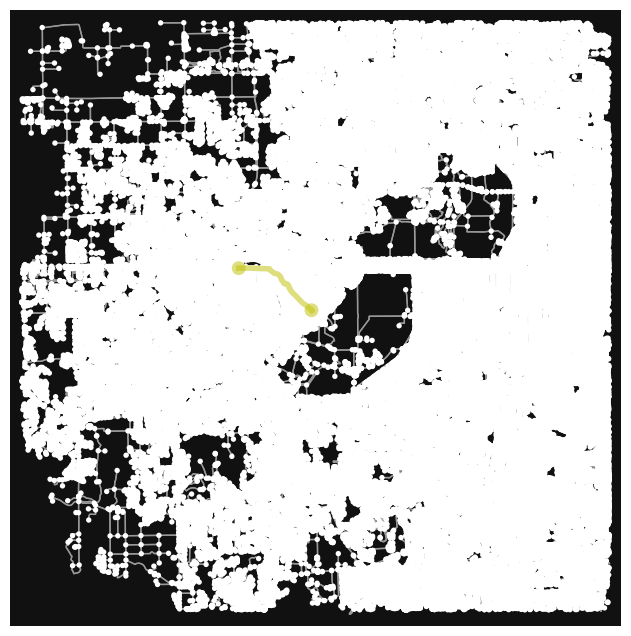

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [46]:
G_modify = ox.graph_from_address(
     address="19910 Stonelodge Drive, Katy, TX",
     dist=20000,
     network_type="all"
)

origin_node = ox.distance.nearest_nodes(G_modify, X=-95.76936856079442, Y=29.78475252436367)
destination_node = ox.distance.nearest_nodes(G_modify, X=-95.7180590970288, Y=29.75915682633438)

myG = GraphL(num_vertices=len(G_modify.nodes()))

for node in G_modify.nodes():
    myG.add_node(node)

for node in G_modify.nodes():
    for neighbor, data in G_modify[node].items():
        for edge_data in data.values():
            weight = edge_data.get('length', 1)
            myG.add_edge(node, neighbor, weight)

fig, ax = ox.plot_graph(G_modify, show=False, close=False)

route = ox.shortest_path(G_modify, origin_node, destination_node)
ox.plot_graph_route(G_modify, route, ax=ax, route_color='y', node_size=0)

# AStar Algorithm


# Heuristic

What is a heuristic?
**answer**

In [47]:
#ChatGPT code for AStar Algorithm
import heapq
import math

class AStar:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    # Heuristic function: Using Euclidean distance
    @staticmethod
    def heuristic(a, b):
        return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    def astar(self, start, goal):
        # Initialize the open list with the starting node
        open_list = []
        heapq.heappush(open_list, (0, start))

        # Store the cost of reaching each node from the start node
        g_cost = {start: 0}

        # Store the total estimated cost of each node
        f_cost = {start: self.heuristic(start, goal)}

        # Keep track of the path
        came_from = {}

        while open_list:
            # Pop the node with the lowest f_cost
            current = heapq.heappop(open_list)[1]

            # If we reach the goal, reconstruct the path
            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(start)
                return path[::-1]  # Return reversed path

            # Explore neighbors from the adjacency list
            for neighbor, cost in self.adjacency_list[current]:
                # Calculate the tentative g_cost for the neighbor
                tentative_g_cost = g_cost[current] + cost

                if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                    # Update the g_cost and f_cost for the neighbor
                    g_cost[neighbor] = tentative_g_cost
                    f_cost[neighbor] = tentative_g_cost + self.heuristic(neighbor, goal)

                    # Add neighbor to the open list with updated priority
                    heapq.heappush(open_list, (f_cost[neighbor], neighbor))

                    # Record the path
                    came_from[neighbor] = current

        return None  # Return None if no path found


# Example adjacency list representation with spatial nodes
adjacency_list = {
    (0, 0): [((1, 0), 1), ((2, 4), 4)],   # Node (0,0) is connected to Node (1,0) (cost 1) and Node (2,4) (cost 4)
    (1, 0): [((2, 0), 1), ((3, 0), 2)],   # Node (1,0) is connected to Node (2,0) (cost 1) and Node (3,0) (cost 2)
    (2, 0): [((4, 0), 1)],                # Node (2,0) is connected to Node (4,0) (cost 1)
    (3, 0): [((4, 0), 3), ((5, 0), 1)],   # Node (3,0) is connected to Node (4,0) (cost 3) and Node (5,0) (cost 1)
    (4, 0): [((5, 0), 1)],                # Node (4,0) is connected to Node (5,0) (cost 1)
    (5, 0): [((6, 0), 2)],                # Node (5,0) is connected to Node (6,0) (cost 2)
    (6, 0): []                            # Node (6,0) is a leaf node with no outgoing edges
}

start = (0, 0)
goal = (6, 0)

# Create an instance of AStar and find the path
astar = AStar(adjacency_list)
path = astar.astar(start, goal)
print("Path found:", path)

Path found: [(0, 0), (1, 0), (2, 0), (4, 0), (5, 0), (6, 0)]


In [48]:
#my implementation